In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [2]:
#선형회귀(최소제곱법)

In [3]:
dataset = pd.read_csv('data/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
#독립변수
X = dataset.iloc[:, :-1].values
X.shape  #2차원 배열

(24, 1)

In [5]:
#종속변수
y = dataset.iloc[:, -1].values
y.shape  #1차원 배열

(24,)

In [6]:
reg = LinearRegression()  #모델 생성
reg.fit(X, y)  #학습

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
#예측
#9시간 공부했을때 점수 예상
pred = reg.predict([[9]])
print(pred[0], pred.shape)

76.30303499314718 (1,)


In [8]:
#8, 7, 5시간 공부했을 때 점수?
pred = reg.predict([[8], [7], [5]])
print(pred[0], pred[1], pred[2], pred.shape)

71.16495023816846 66.02686548318972 55.75069597323227 (3,)


In [9]:
import math
import numpy as np
max = math.ceil(X.max())
xticks = [x for x in np.arange(0, max+1, 0.5)]
xticks

[np.float64(0.0),
 np.float64(0.5),
 np.float64(1.0),
 np.float64(1.5),
 np.float64(2.0),
 np.float64(2.5),
 np.float64(3.0),
 np.float64(3.5),
 np.float64(4.0),
 np.float64(4.5),
 np.float64(5.0),
 np.float64(5.5),
 np.float64(6.0),
 np.float64(6.5),
 np.float64(7.0),
 np.float64(7.5),
 np.float64(8.0),
 np.float64(8.5),
 np.float64(9.0),
 np.float64(9.5),
 np.float64(10.0),
 np.float64(10.5),
 np.float64(11.0),
 np.float64(11.5)]

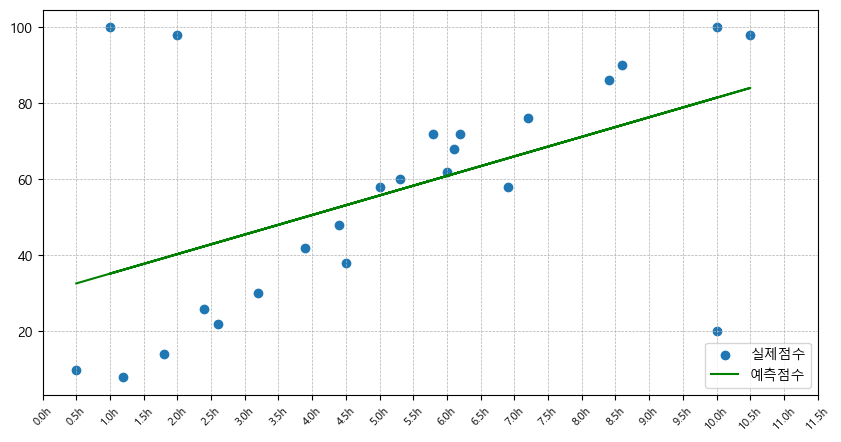

In [10]:
#실제점수와 예측점수의 시각화
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='실제점수')
plt.plot(X, reg.predict(X), color='g', label='예측점수')

plt.legend()
plt.grid(True, ls='--', lw=0.5)

import math
import numpy as np
max = math.ceil(X.max())
xticks = [x for x in np.arange(0, max+1, 0.5)]
plt.xticks(xticks, [f'{x}h' for x in xticks], size=8, rotation=45)

plt.show()

In [11]:
#y = mx+b
m = reg.coef_
b = reg.intercept_

y = m*9 + b
y

array([76.30303499])

In [12]:
reg.predict([[9]])

array([76.30303499])

선형회귀 - 경사하강법

In [13]:
from sklearn.linear_model import SGDRegressor

In [14]:
#종속변수
y = dataset.iloc[:, -1].values
y.shape  #1차원 배열
X.shape, y.shape

((24, 1), (24,))

In [15]:
sr = SGDRegressor()
sr.fit(X, y)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


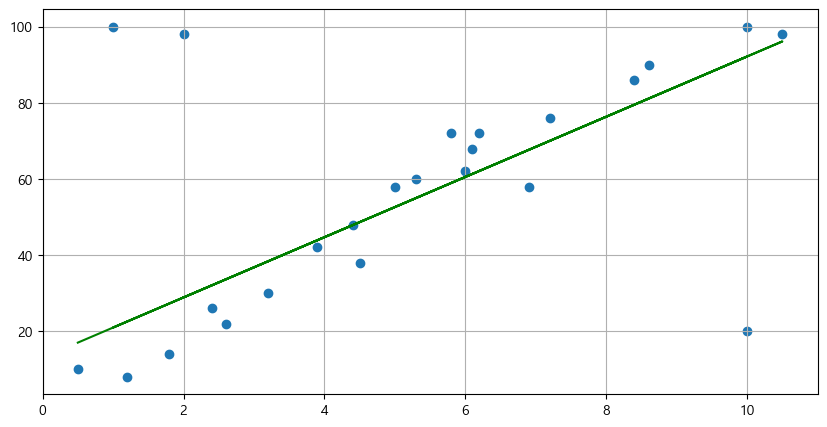

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.plot(X, sr.predict(X), c= 'g')

plt.grid(True, )

plt.show()

In [17]:
sr.score(X, y), reg.score(X, y)

(0.17041951635421093, 0.25285139961948266)

In [18]:
sr.coef_, reg.coef_, sr.intercept_, reg.intercept_

(array([7.9177912]),
 array([5.13808475]),
 array([13.01762863]),
 np.float64(30.060272198338613))

In [19]:
#독립변수, 종속변수
X = dataset.iloc[:, :-1].values  #X.shape: (20, 1) - 2차원 배열
y = dataset.iloc[:, -1].values  #y.shape:  (20, ) - 1차원 배열

In [20]:
#옵션
sr = SGDRegressor(max_iter=1500, eta0=0.0001, random_state=0, verbose=1)
sr.fit(X, y)

-- Epoch 1
Norm: 0.44, NNZs: 1, Bias: 0.075703, T: 24, Avg. loss: 1964.477998
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.75, NNZs: 1, Bias: 0.127805, T: 48, Avg. loss: 1844.540213
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.172712, T: 72, Avg. loss: 1754.127689
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 1, Bias: 0.212752, T: 96, Avg. loss: 1677.682334
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.46, NNZs: 1, Bias: 0.249549, T: 120, Avg. loss: 1611.008469
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.66, NNZs: 1, Bias: 0.283658, T: 144, Avg. loss: 1551.264042
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.84, NNZs: 1, Bias: 0.315758, T: 168, Avg. loss: 1497.096656
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.01, NNZs: 1, Bias: 0.346062, T: 192, Avg. loss: 1447.431960
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.18, NNZs: 1, Bias: 0.374891, T: 216, Avg. loss: 1401.614748
Total trainin

c:\Users\AIPM2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1500
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


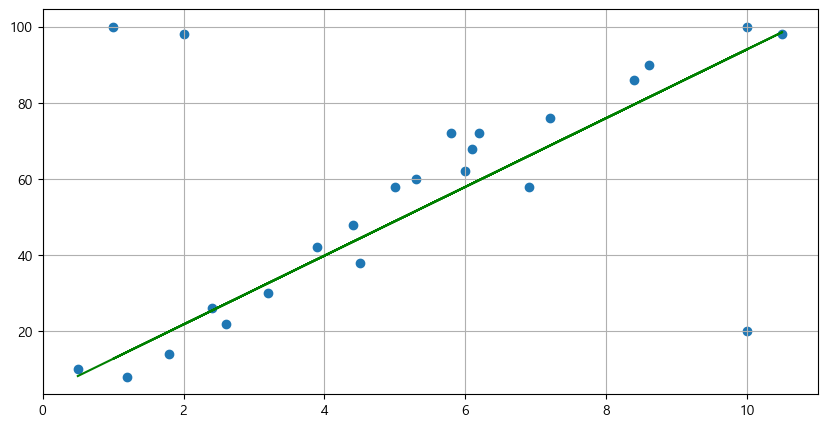

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.plot(X, sr.predict(X), c= 'g')

plt.grid(True, )

plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
def model_sgd(iter, eta0):
    sr = SGDRegressor(max_iter=iter, eta0=eta0, random_state=0)
    sr = sr.fit(X, y)
    return sr 

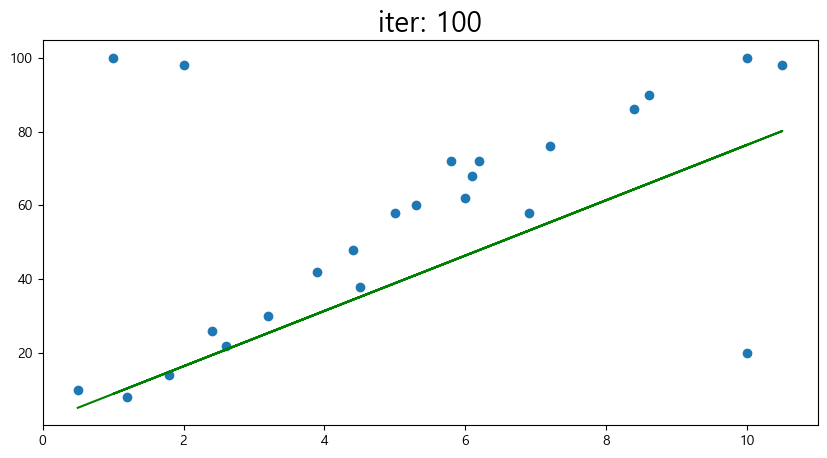

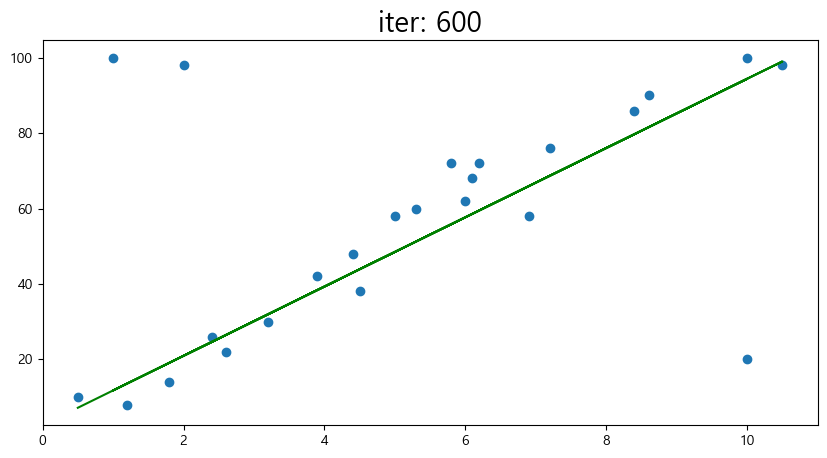

In [24]:
import time

for i in range(100, 1001, 500):
    sr = model_sgd(i, 1e-4)
    time.sleep(3)

    plt.close()
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.plot(X, sr.predict(X), c= 'g')

    plt.title(f'iter: {i}', size = 20)
    plt.show()